In [1]:
# Import the libraries
import numpy as np
import pandas as pd
# Load the Data
X = pd.read_csv(r'C:\Data\DeepLearningWorkshop/aps_failure_training_feats.csv')
y = pd.read_csv(r'C:\Data\DeepLearningWorkshop/aps_failure_training_target.csv')

In [2]:
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, \
y_train, y_test = train_test_split(X, y, \
                  test_size=0.20, random_state=seed)

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Transform the training data
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X_test.columns)
# Transform the testing data
X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test,columns=X_train.columns)

In [4]:
# Import the relevant Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow import random
np.random.seed(seed)
random.set_seed(seed)
model = Sequential()
# Add the hidden dense layers and with dropout Layer
model.add(Dense(units=64, activation='relu', \
                kernel_initializer='uniform', \
                input_dim=X_train.shape[1]))
model.add(Dropout(rate=0.5))
model.add(Dense(units=32, activation='relu', \
                kernel_initializer='uniform'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=16, activation='relu', \
                kernel_initializer='uniform'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=8, activation='relu', \
                kernel_initializer='uniform'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=4, activation='relu', \
                kernel_initializer='uniform'))
model.add(Dropout(rate=0.1))
# Add Output Dense Layer
model.add(Dense(units=1, activation='sigmoid', \
                kernel_initializer='uniform'))
# Compile the Model
model.compile(optimizer='adam', \
              loss='binary_crossentropy', \
              metrics=['accuracy'])

Using TensorFlow backend.


In [5]:
model.fit(X_train, y_train, epochs=100, \
          batch_size=20, verbose=1, \
          validation_split=0.2, shuffle=False)

Train on 38400 samples, validate on 9600 samples
Epoch 1/100
38400/38400 [==============================] - 4s 116us/step - loss: 0.0809 - accuracy: 0.9833 - val_loss: 0.0351 - val_accuracy: 0.9842
Epoch 2/100
38400/38400 [==============================] - 4s 99us/step - loss: 0.0424 - accuracy: 0.9834 - val_loss: 0.0343 - val_accuracy: 0.9842
Epoch 3/100
38400/38400 [==============================] - 4s 103us/step - loss: 0.0382 - accuracy: 0.9834 - val_loss: 0.0313 - val_accuracy: 0.9842
Epoch 4/100
38400/38400 [==============================] - 4s 99us/step - loss: 0.0340 - accuracy: 0.9834 - val_loss: 0.0328 - val_accuracy: 0.9842
Epoch 5/100
38400/38400 [==============================] - 3s 88us/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0297 - val_accuracy: 0.9900
Epoch 6/100
38400/38400 [==============================] - 4s 103us/step - loss: 0.0332 - accuracy: 0.9901 - val_loss: 0.0293 - val_accuracy: 0.9896
Epoch 7/100
38400/38400 [==============================] - 4

38400/38400 [==============================] - 3s 71us/step - loss: 0.0217 - accuracy: 0.9942 - val_loss: 0.0442 - val_accuracy: 0.9926
Epoch 56/100
38400/38400 [==============================] - 3s 89us/step - loss: 0.0209 - accuracy: 0.9946 - val_loss: 0.0402 - val_accuracy: 0.9931
Epoch 57/100
38400/38400 [==============================] - 3s 67us/step - loss: 0.0223 - accuracy: 0.9937 - val_loss: 0.0445 - val_accuracy: 0.9920
Epoch 58/100
38400/38400 [==============================] - 3s 67us/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.0394 - val_accuracy: 0.9919
Epoch 59/100
38400/38400 [==============================] - 3s 72us/step - loss: 0.0214 - accuracy: 0.9940 - val_loss: 0.0309 - val_accuracy: 0.9916
Epoch 60/100
38400/38400 [==============================] - 3s 72us/step - loss: 0.0232 - accuracy: 0.9945 - val_loss: 0.0457 - val_accuracy: 0.9917
Epoch 61/100
38400/38400 [==============================] - 3s 75us/step - loss: 0.0227 - accuracy: 0.9946 - val_loss: 

In [6]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [7]:
from sklearn.metrics import confusion_matrix
y_pred_class1 = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred_class1)
print(cm)

[[11746    42]
 [   82   130]]


In [8]:
# True Negative
TN = cm[0,0]
# False Negative
FN = cm[1,0]
# False Positives
FP = cm[0,1]
# True Positives
TP = cm[1,1]

In [9]:
# Calculating Sensitivity
Sensitivity = TP / (TP + FN)
print(f'Sensitivity: {Sensitivity:.4f}')

Sensitivity: 0.6132


In [10]:
# Calculating Specificity
Specificity = TN / (TN + FP)
print(f'Specificity: {Specificity:.4f}')

Specificity: 0.9964


In [12]:
# Precision
Precision = TP / (TP + FP)
print(f'Precision: {Precision:.4f}')# Calculate False positive rate
False_Positive_rate = FP / (FP + TN)
print(f'False positive rate: \
      {False_Positive_rate:.4f}')

Precision: 0.7558
False positive rate:       0.0036


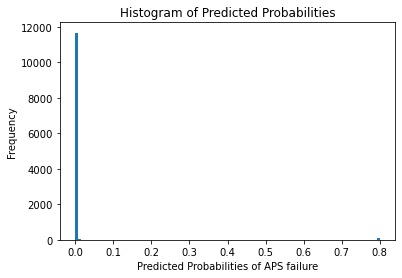

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
# histogram of class distribution
plt.hist(y_pred_prob, bins=100)
plt.title("Histogram of Predicted Probabilities")
plt.xlabel("Predicted Probabilities of APS failure")
plt.ylabel("Frequency")
plt.show()